# Choice Modelling

We make choices every day, and often these choices are made among a finite number of potential alternatives. For example, do we take the car or ride a bike to get to work? Will we have dinner at home or eat out, and if we eat out, where do we go? Scientists, marketing analysts, or political consultants, to name a few, wish to find out why people choose what they choose. We can model these choices as we can model other things.

Choice modelling is about following the decision process of individuals and understanding the kinds of decisions they make: https://en.wikipedia.org/wiki/Choice_modelling/ and https://www.r-bloggers.com/choice-modeling-with-features-defined-by-consumers-and-not-researchers/. 

Choice modelling is often closely linked to surveys. For instance, research into chocolate preferences.

## Use Case: Chocolates

In this survey, a respondent chooses between three chocolate bars with different brand, price and type. 

The data shows one choice in each row. 
The data is in wide format, and each row represents one choice. 
In wide format, categorical data is always grouped. It is easier to read and interpret as compared to long format, which we will introduce later. Wide format is often the output if you use tools like surveymonkey, etc.

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

chocolate_wide = pd.read_csv("chocolate_choice_wide.csv")
chocolate_wide.describe()

,Subject,Trial,Price1,Price2,Price3,Selection,Response_Time
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,2409.071429,13.000000,2.143714,2.255429,2.233143,1.925714,4712.762857
std,4.824488,7.221426,1.086042,1.041028,1.045273,0.818953,2951.380156
min,2401.000000,1.000000,0.500000,0.500000,0.500000,1.000000,1021.000000
25%,2405.000000,7.000000,1.100000,1.300000,1.300000,1.000000,2750.000000
50%,2409.500000,13.000000,2.200000,2.400000,2.200000,2.000000,3878.500000
75%,2413.000000,19.000000,3.100000,3.200000,3.100000,3.000000,5766.500000
max,2417.000000,25.000000,4.000000,4.000000,4.000000,3.000000,24462.000000


Check out some details. How many choices are part of the chocolate_wide data frame?

In [55]:
chocolate_wide.head()

,Subject,Trial,Brand1,Brand2,Brand3,Price1,Price2,Price3,Type1,Type2,Type3,Selection,Response_Time
0,2401,1,Dove,Godiva,Dove,0.6,0.7,3.6,Milk,Dark,White,1,5210
1,2401,2,Godiva,Godiva,Hershey's,2.7,3.9,0.7,Milk w/ Nuts,Dark,Milk w/ Nuts,2,7480
2,2401,3,Hershey's,Godiva,Hershey's,1.7,3.7,3.0,Dark w/ Nuts,Dark,Dark,2,7704
3,2401,4,Lindt,Lindt,Ghirardelli,1.0,3.6,0.5,Milk,Milk w/ Nuts,Dark w/ Nuts,1,5774
4,2401,5,Hershey's,Godiva,Hershey's,0.8,1.5,3.3,Milk w/ Nuts,Dark,White,2,5238


You can also select individuals with subset. In this case, we are looking at subject 2408 in trial 3.

In [56]:
subject = chocolate_wide.loc[(chocolate_wide['Subject'] == 2408) & (chocolate_wide['Trial'] == 3)]
subject

,Subject,Trial,Brand1,Brand2,Brand3,Price1,Price2,Price3,Type1,Type2,Type3,Selection,Response_Time
127,2408,3,Dove,Hershey's,Lindt,2.6,1.5,3.4,Milk w/ Nuts,Milk,White,2,6391


### Converting from wide  to long data

Our algorithms need the long data. In the long vertical format, every row represents an observation belonging to a particular category. You can use pandas wide_to_long()

With reshape directions indicate the direction of the data transformation (in this case long), while stubnames indicates the columns you would like to summarize. Here, it is Brand, Price and Type. i gives the  columns names that you want to keep. j, finally, is the variable in long format that differentiates multiple records from the same group or individual.

In [271]:
chocolate_df = pd.wide_to_long(chocolate_wide, stubnames=['Brand','Price','Type'], i=['Subject', 'Trial', 'Selection', 'Response_Time'], j='Alt').reset_index()
chocolate_df

,Subject,Trial,Selection,Response_Time,Alt,Brand,Price,Type
0,2401,1,1,5210,1,Dove,0.6,Milk
1,2401,1,1,5210,2,Godiva,0.7,Dark
2,2401,1,1,5210,3,Dove,3.6,White
3,2401,2,2,7480,1,Godiva,2.7,Milk w/ Nuts
4,2401,2,2,7480,2,Godiva,3.9,Dark
...,...,...,...,...,...,...,...,...
1045,2417,24,3,7130,2,Godiva,3.2,Milk w/ Nuts
1046,2417,24,3,7130,3,Ghirardelli,1.4,Milk w/ Nuts
1047,2417,25,3,7315,1,Lindt,1.1,White
1048,2417,25,3,7315,2,Ghirardelli,0.8,White


For survey data, we often want the individual/subject to come first, then the trial/experiment and finally the choice. Let's order the data so that this will be the case.

In [74]:
chocolate_df = chocolate_df[["Subject", "Trial", "Selection", "Response_Time", "Alt", "Brand", "Price", "Type"]]

In [75]:
chocolate_df

,Subject,Trial,Selection,Response_Time,Alt,Brand,Price,Type
0,2401,1,1,5210,1,Dove,0.6,Milk
1,2401,1,1,5210,2,Godiva,0.7,Dark
2,2401,1,1,5210,3,Dove,3.6,White
3,2401,2,2,7480,1,Godiva,2.7,Milk w/ Nuts
4,2401,2,2,7480,2,Godiva,3.9,Dark
...,...,...,...,...,...,...,...,...
1045,2417,24,3,7130,2,Godiva,3.2,Milk w/ Nuts
1046,2417,24,3,7130,3,Ghirardelli,1.4,Milk w/ Nuts
1047,2417,25,3,7315,1,Lindt,1.1,White
1048,2417,25,3,7315,2,Ghirardelli,0.8,White


The variable Alt labels the chocolate alternatives, and the  variable Selection indicates the chosen alternative. Let's transform Selection into a logical variable that indicates whether a certain alternative was chosen. Do you know how?

In [76]:
chocolate_df.loc[chocolate_df['Selection'] != chocolate_df['Alt'],'Selection'] = False 
chocolate_df.loc[chocolate_df['Selection'] == chocolate_df['Alt'],'Selection'] = True 


In [77]:
chocolate_df

,Subject,Trial,Selection,Response_Time,Alt,Brand,Price,Type
0,2401,1,True,5210,1,Dove,0.6,Milk
1,2401,1,False,5210,2,Godiva,0.7,Dark
2,2401,1,False,5210,3,Dove,3.6,White
3,2401,2,False,7480,1,Godiva,2.7,Milk w/ Nuts
4,2401,2,True,7480,2,Godiva,3.9,Dark
...,...,...,...,...,...,...,...,...
1045,2417,24,False,7130,2,Godiva,3.2,Milk w/ Nuts
1046,2417,24,True,7130,3,Ghirardelli,1.4,Milk w/ Nuts
1047,2417,25,False,7315,1,Lindt,1.1,White
1048,2417,25,False,7315,2,Ghirardelli,0.8,White


A few visualisations at the end.

<AxesSubplot:>

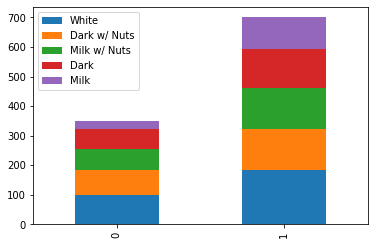

In [141]:
TRUE = chocolate_df.loc[chocolate_df['Selection'] == True]
true_type = TRUE['Type'].value_counts().to_list()
FALSE = chocolate_df.loc[chocolate_df['Selection'] == False]
false_type = FALSE['Type'].value_counts().to_list()

df = pd.DataFrame([true_type, false_type], columns=[ 'White', 'Dark w/ Nuts', 'Milk w/ Nuts', 'Dark', 'Milk'])
df.plot.bar(stacked=True)

In [142]:
from statsmodels.graphics.mosaicplot import mosaic

(<Figure size 432x288 with 3 Axes>,
 {('Dove', 'True'): (0.0, 0.0, 0.19981325863678803, 0.307386592976682),
  ('Dove', 'False'): (0.0,
   0.3107088521128947,
   0.19981325863678803,
   0.6892911478871053),
  ('Godiva', 'True'): (0.20471521942110177,
   0.0,
   0.21942110177404295,
   0.4198770057255955),
  ('Godiva', 'False'): (0.20471521942110177,
   0.42319926486180814,
   0.21942110177404295,
   0.5768007351381917),
  ("Hershey's", 'True'): (0.4290382819794585,
   0.0,
   0.19327731092436973,
   0.2166690741008233),
  ("Hershey's", 'False'): (0.4290382819794585,
   0.21999133323703593,
   0.19327731092436973,
   0.780008666762964),
  ('Lindt', 'True'): (0.6272175536881419,
   0.0,
   0.1942110177404295,
   0.29708663429593657),
  ('Lindt', 'False'): (0.6272175536881419,
   0.3004088934321492,
   0.1942110177404295,
   0.6995911065678506),
  ('Ghirardelli', 'True'): (0.8263305322128851,
   0.0,
   0.17366946778711487,
   0.4179616332654592),
  ('Ghirardelli', 'False'): (0.82633053221

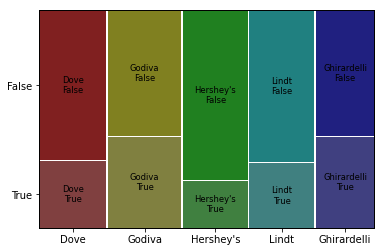

In [175]:
brands = chocolate_df['Brand'].tolist()
selections = chocolate_df['Selection'].tolist()
data = pd.DataFrame({'brand': brands, 'selection': selections})
mosaic(data, ['brand', 'selection'])

### Conjoint Analysis

We have just done the beginning of a conjoint analysis. Conjoint analysis is a set of market research techniques that measures the value the market places on each feature of your product and predicts the value of any combination of features. Conjoint analysis is, at its essence, all about features and trade-offs. With conjoint analysis, you ask questions that force respondents to make trade-offs among features
- Determine the value they place on each feature based on the trade-offs they make
- Simulate how the market reacts to various feature trade-offs you are considering

https://www.pragmaticmarketing.com/resources/articles/conjoint-analysis-101
https://www.coursera.org/lecture/uva-darden-bcg-pricing-strategy-customer-value/conjoint-analysis-steps-1-3-pRWBU

## Modelling

Statsmodels

In [239]:
import statsmodels.api as sm

X = chocolate_df[['Brand', 'Type', 'Price']]
X = pd.get_dummies(data=X, drop_first=True)
Y = chocolate_df['Selection']
X = sm.add_constant(X)

model = sm.Logit(Y.astype(float), X.astype(float)).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

Optimization terminated successfully.
         Current function value: 0.578947
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Selection   No. Observations:                 1050
Model:                          Logit   Df Residuals:                     1040
Method:                           MLE   Df Model:                            9
Date:                Fri, 01 Oct 2021   Pseudo R-squ.:                 0.09044
Time:                        12:09:02   Log-Likelihood:                -607.89
converged:                       True   LL-Null:                       -668.34
Covariance Type:            nonrobust   LLR p-value:                 8.781e-22
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2430      0.248      0.979      0.327      -0.243       0.729
Price   

The coef indicates the significance of the features. White Chocolate is, e.g, -1.7, which means people really don't like it.

The ratio of coefficients usually provides economically meaningful information. E.g., an interesting attribute is the Willingness to pay (WTP) or the maximum price at or below which a consumer will definitely buy one unit of a product (https://en.wikipedia.org/wiki/Willingness_to_pay).

We can calculate the wtp by dividing the coefficient vector by the negative of the price coefficient 

In [246]:
coefs = model.params
coefs/-(coefs[1])

const                0.815551
Price               -1.000000
Brand_Ghirardelli    1.916126
Brand_Godiva         2.014521
Brand_Hershey's     -1.455449
Brand_Lindt         -0.263483
Type_Dark w/ Nuts   -1.454214
Type_Milk            0.236231
Type_Milk w/ Nuts   -1.630954
Type_White          -6.063961
dtype: float64

A nice trick to get a better overview of prices is to factorize them and then model for price levels. Let's change the Price variable to a factor in the chocolate data.

In [287]:
# chocolate_df['Price'].factorize
chocolate_df['Price'] = chocolate_df['Price'].astype(object)
ch_df = chocolate_df[pd.notnull(chocolate_df['Price'])]
ch_df

,Subject,Trial,Selection,Response_Time,Alt,Brand,Price,Type
0,2401,1,1,5210,1,Dove,0.6,Milk
1,2401,1,1,5210,2,Godiva,0.7,Dark
2,2401,1,1,5210,3,Dove,3.6,White
3,2401,2,2,7480,1,Godiva,2.7,Milk w/ Nuts
4,2401,2,2,7480,2,Godiva,3.9,Dark
...,...,...,...,...,...,...,...,...
1045,2417,24,3,7130,2,Godiva,3.2,Milk w/ Nuts
1046,2417,24,3,7130,3,Ghirardelli,1.4,Milk w/ Nuts
1047,2417,25,3,7315,1,Lindt,1.1,White
1048,2417,25,3,7315,2,Ghirardelli,0.8,White


In [290]:
# X = ch_df[['Brand', 'Type', 'Price']]
# X = pd.get_dummies(data=X, drop_first=True)
# Y = ch_df['Selection']
# # X = sm.add_constant(X)

# model = sm.Logit(Y, X).fit()
# predictions = model.predict(X) 

# print_model = model.summary()
# print(print_model)

In [275]:
# what does the factorizing do?
# Why does logistic regression not work?